
# Task - TensorFlow


You've written a lot of code in this assignment to provide a whole host of neural network functionality. Dropout, Batch Norm, and 2D convolutions are some of the workhorses of deep learning in computer vision.

You've also worked hard to make your code efficient and vectorized.

For the this assignment, though, we're going to leave behind your beautiful codebase and instead migrate to one of two popular deep learning frameworks: in this instance, **TensorFlow**

The goals of this assignment are as follows:

    * Use TensorFlow at three different levels of abstraction,
    * Barebone TensorFlow: work directly with low-level TensorFlow graphs.
    * Keras Sequential API: use tf.keras.Sequential to define a linear feed-forward network.
    * Keras Model API: use tf.keras.Model to define arbitrary neural network architecture.



---
## About Tensorflow


<img src="https://www.gstatic.com/devrel-devsite/va3a0eb1ff00a004a87e2f93101f27917d794beecfd23556fc6d8627bba2ff3cf/tensorflow/images/lockup.svg" alt="tensorflow" width="300px"/>

[TensorFlow](https://www.tensorflow.org/) is a **Deep Learning Library**, developed by the Google Brain Team within the Google Machine Learning Intelligence research organization, for the purposes of machine learning and artificial neural network research.

TensorFlow is a system for executing computational graphs over Tensor objects, with native support for performing backpropogation for its Variables. In it, we work with Tensors which are n-dimensional arrays analogous to the numpy ndarray.



**Tensorflow Key Features**

* Define, optimize and efficiently calculate mathematical expressions involving multi-dimensional arrays (tensors).
* Programming support from deep neural networks and machine learning techniques.
* Use of GPU computing and automatic memory optimization.
* High computing capability across machines and large data sets.

TensorFlow is available with Python and C ++ support, but the Python API is more supported and easier to learn.




---
## About Keras

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="keras" width="300px"/>

[Keras](https://keras.io/) is a very modular and minimalist **Deep Learning Library**, written in Python and capable of running on TensorFlow or Theano. This library was developed with a focus on enabling fast experiments.

At first Keras was developed to help users to easily use Theano and Tensorflow's which at the time was very technical and complex in implementation.

Since Tensorflow version 1.5, Keras was adopted by Google and since then the built API has been included in the Tensorflow distribution.

---

Working with Tensorflow will give us benefits:

* Our code will now run on GPUs! Much faster training. Writing your own modules to run on GPUs is beyond the scope of this class, unfortunately.

* We want you to be ready to use one of these frameworks for your project so you can experiment more efficiently than if you were writing every feature you want to use by hand.

* We want you to stand on the shoulders of giants! TensorFlow and PyTorch are both excellent frameworks that will make your lives a lot easier, and now that you understand their guts, you are free to use them :)

* We want you to be exposed to the sort of deep learning code you might run into in academia or industry.

---
## GPU Runtime
Since we're going to use TensorFlow, we can utilize the GPU to accelerate the process

For that, make sure that this Colaboratory file is set to use GPU

* select **Runtime** in taskbar
* select **Change Runtime Type**
* choose Hardware accelerator **GPU**

<center>
  
![gpu](https://i.ibb.co/QX3Brf0/gpu.png)


---
---
#[Part 0] Import Libraries and Load Data

---
## 1 - Import Libraries

Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.WARN)

Write down your Name and Student ID

In [2]:
## --- start your code here ----

NIM = print('Andi Muhammad Yanwar')
Nama = print('21/480350/PA/20863')

## --- end your code here ----

Andi Muhammad Yanwar
21/480350/PA/20863


---
## 2 - Load CIFAR-10

In [3]:
(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


---
## 3 - Split Validation Data

In [4]:
X_val_ori = X_train_ori[-1000:,:]
y_val     = y_train[-1000:]

X_train_ori = X_train_ori[:-1000, :]
y_train     = y_train[:-1000]

---
## 4 - Normalize and Reshape Data

In [5]:
X_train = X_train_ori.astype('float32')
X_val   = X_val_ori.astype('float32')
X_test  = X_test_ori.astype('float32')

mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)

X_train = (X_train - mean_pixel) / std_pixel
X_val = (X_val - mean_pixel) / std_pixel
X_test = (X_test - mean_pixel) / std_pixel

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val   = y_val.ravel()
y_test  = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49000, 32, 32, 3)
X_val.shape   = (1000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)


---
## 5 - Dataset object

For the Barebones TensorFlow that we will implament later, we need a mechanism to iterate the batch through the datasets.

For our own convenience we'll define a lightweight `Dataset` class which lets us iterate over data and labels.

This is not the most flexible or most efficient way to iterate through data, but it will serve our purposes.

In [6]:
class Dataset(object):
    def __init__(self, X, y, batch_size, shuffle=False):
        """
        Construct a Dataset object to iterate over data X and labels y

        Inputs:
        - X: Numpy array of data, of any shape
        - y: Numpy array of labels, of any shape but with y.shape[0] == X.shape[0]
        - batch_size: Integer giving number of elements per minibatch
        - shuffle: (optional) Boolean, whether to shuffle the data on each epoch
        """
        assert X.shape[0] == y.shape[0], 'Got different numbers of data and labels'
        self.X, self.y = X, y
        self.batch_size, self.shuffle = batch_size, shuffle

    def __iter__(self):
        N, B = self.X.shape[0], self.batch_size
        idxs = np.arange(N)
        if self.shuffle:
            np.random.shuffle(idxs)
        return iter((self.X[i:i+B], self.y[i:i+B]) for i in range(0, N, B))


train_dset = Dataset(X_train, y_train, batch_size=64, shuffle=True)
val_dset   = Dataset(X_val, y_val, batch_size=64, shuffle=False)
test_dset  = Dataset(X_test, y_test, batch_size=64)

---
---
# [Part 1] Barebones Three-Layer ConvNet

Here you will complete the implementation of the function three_layer_convnet which will perform the forward pass of a three-layer convolutional network.


A three-layer convolutional network with the following architecture:

<pre>
|             |             |                  |
| <font color='red'>conv</font> - <font color=''>relu</font> | <font color='red'>conv</font> - <font color=''>relu</font> | <font color='brown'>affine</font> - <font color=''>softmax</font> |
|             |             |                  |
|       1     |      2      |        3         |
</pre>
<br>

---
## 1 - Forward Function

---
#### <font color='red'>**EXERCISE:** </font>

    Implement three_layer_convnet() function


**HINT**: For convolutions: https://www.tensorflow.org/api_docs/python/tf/nn/conv2d; be careful with padding!

**HINT**: For biases: https://www.tensorflow.org/performance/xla/broadcasting


In [7]:
tf.compat.v1.disable_eager_execution()
def three_layer_convnet(x, params):
    """
    A three-layer convolutional network with the architecture described above.

    Inputs:
    - x     : A TensorFlow Tensor of shape (N, H, W, 3) giving a minibatch of images
    - params: A list of TensorFlow Tensors giving the weights and biases for the
              network; should contain the following:
      - conv_w1: TensorFlow Tensor of shape (KH1, KW1, 3, channel_1) giving
                 weights for the first convolutional layer.
      - conv_b1: TensorFlow Tensor of shape (channel_1,) giving biases for the
                 first convolutional layer.
      - conv_w2: TensorFlow Tensor of shape (KH2, KW2, channel_1, channel_2)
                 giving weights for the second convolutional layer
      - conv_b2: TensorFlow Tensor of shape (channel_2,) giving biases for the
                 second convolutional layer.
      - fc_w   : TensorFlow Tensor giving weights for the fully-connected layer.
      - fc_b   : TensorFlow Tensor giving biases for the fully-connected layer.
    """
    conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b = params
    scores = None

    # ------------------------------------------------
    # 1. Forward Pass
    # ------------------------------------------------

    # padding valid for first convolutional layer
    paddings = tf.constant([[0,0], [2,2], [2,2], [0,0]])
    x = tf.pad(x, paddings, 'CONSTANT')

    # call tf.nn.conv2d function with input x, conv_w1, strides=[1, 1, 1, 1], and padding='valid'
    conv1 = tf.nn.conv2d(input=x, filters=conv_w1, strides=[1, 1, 1, 1], padding='VALID')

    # add conv1 with bias conv_b1
    conv1 = tf.nn.bias_add(conv1, conv_b1)

    # call tf.nn.relu function with input conv1
    relu1 = tf.nn.relu(conv1)

    # padding valid for second convolutional layer
    paddings = tf.constant([[0,0], [1,1], [1,1], [0,0]])
    relu1 = tf.pad(relu1, paddings, 'CONSTANT')

    # call tf.nn.conv2d function with input relu1, conv_w2, strides=[1, 1, 1, 1], and padding='valid'
    conv2 = tf.nn.conv2d(input=relu1, filters=conv_w2, strides=[1, 1, 1, 1], padding='VALID')

    # add conv2 with bias conv_b2
    conv2 = tf.nn.bias_add(conv2, conv_b2)

    # call tf.nn.relu function with input conv2
    relu2 = tf.nn.relu(conv2)

    # get the output shape of second convolutional layer
    out_shape = tf.shape(relu2)[0]

    # flatten output by calling tf.reshape with input relu2 and (outshape, -1)
    relu2_flat = tf.reshape(relu2, (out_shape, -1))

    # calculate output score by performing affine layer calculation
    # call tf.matmul function with input relu2 and fc_w
    # then add with bias fc_b
    scores = tf.matmul(relu2_flat, fc_w) + fc_b


    return scores

---
Check your implementations

We use the `three_layer_convnet` function to set up the computational graph, then run the graph on a batch of zeros just to make sure the function doesn't crash, and produces outputs of the correct shape.

When you run this function, `scores_np` should have shape `(64, 10)`.

In [8]:
def three_layer_convnet_test():
    tf.compat.v1.reset_default_graph()

    with tf.device('/device:GPU:0'):
        x = tf.compat.v1.placeholder(tf.float32)
        conv_w1 = tf.zeros((5, 5, 3, 6))
        conv_b1 = tf.zeros((6,))
        conv_w2 = tf.zeros((3, 3, 6, 9))
        conv_b2 = tf.zeros((9,))
        fc_w = tf.zeros((32 * 32 * 9, 10))
        fc_b = tf.zeros((10,))
        params = [conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b]
        scores = three_layer_convnet(x, params)

    # Inputs to convolutional layers are 4-dimensional arrays with shape
    # [batch_size, height, width, channels]
    x_np = np.zeros((64, 32, 32, 3))

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        scores_np = sess.run(scores, feed_dict={x: x_np})
        print('scores_np has shape: ', scores_np.shape)

with tf.device('/cpu:0'):
    three_layer_convnet_test()

scores_np has shape:  (64, 10)


**EXPECTED OUTPUT**:
<pre>
 scores_np has shape:  (64, 10)

---
## 2 - Training Step

We now define the `training_step` function which sets up the part of the computational graph that performs a single training step.

This will take three basic steps:

1. Compute the loss
2. Compute the gradient of the loss with respect to all network weights
3. Make a weight update step using (stochastic) gradient descent.


---
#### <font color='red'>**EXERCISE:** </font>

    Implement training_step() function


We need to use a few new TensorFlow functions to do all of this:
- For computing the cross-entropy loss we'll use `tf.nn.sparse_softmax_cross_entropy_with_logits`:
 - https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits

- For averaging the loss across a minibatch of data we'll use `tf.reduce_mean`:
 - https://www.tensorflow.org/api_docs/python/tf/reduce_mean

- For computing gradients of the loss with respect to the weights we'll use `tf.gradients`:
 - https://www.tensorflow.org/api_docs/python/tf/gradients

- We'll mutate the weight values stored in a TensorFlow Tensor using `tf.assign_sub`:
 - https://www.tensorflow.org/api_docs/python/tf/assign_sub

- We'll add a control dependency to the graph using `tf.control_dependencies`:
 - https://www.tensorflow.org/api_docs/python/tf/control_dependencies


In [9]:
def training_step(scores, y, params, lr):
    """
    Set up the part of the computational graph which makes a training step.

    Inputs:
    - scores : TensorFlow Tensor of shape (N, C) giving classification scores
               for the model.
    - y      : TensorFlow Tensor of shape (N,) giving ground-truth labels for scores;
               y[i] == c means that c is the correct class for scores[i].
    - params : List of TensorFlow Tensors giving the weights of the model
    - lr     : Python scalar giving the learning rate to use for
               gradient descent step.

    Returns:
    - loss : A TensorFlow Tensor of shape () (scalar) giving the loss for this
             batch of data; evaluating the loss also performs a gradient descent
             step on params (see above).
    """


    # ------------------------------------------------
    # 2. Calculate Loss
    # ------------------------------------------------
    # First compute the loss; the first line gives losses for each example in
    # the minibatch, and the second averages the losses acros the batch

    # call tf.nn.sparse_softmax_cross_entropy_with_logits function
    # with input labels=y and logits=scores
    losses = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=scores)

    # call tf.reduce_mean function with input loses
    loss = tf.reduce_mean(losses)


    # ------------------------------------------------
    # 3. Backward Pass
    # ------------------------------------------------

    # Compute the gradient of the loss with respect to each parameter of the the
    # network. This is a very magical function call: TensorFlow internally
    # traverses the computational graph starting at loss backward to each element
    # of params, and uses backpropagation to figure out how to compute gradients;
    # it then adds new operations to the computational graph which compute the
    # requested gradients, and returns a list of TensorFlow Tensors that will
    # contain the requested gradients when evaluated.

    # call tf.gradients function with input loss and params
    grad_params = tf.gradients(loss, params)


    # ------------------------------------------------
    # 4. Weight Update
    # ------------------------------------------------
    # Make a gradient descent step on all of the model parameters.
    new_weights = []
    for w, grad_w in zip(params, grad_params):
        new_w = tf.compat.v1.assign_sub(w, lr * grad_w)
        new_weights.append(new_w)

    # Insert a control dependency so that evaluting the loss causes a weight
    # update to happen; see the discussion above.
    with tf.control_dependencies(new_weights):
        return tf.identity(loss)

---
## 3 - Training Loop
Now we set up a basic training loop using low-level TensorFlow operations. We will train the model using stochastic gradient descent without momentum. The `training_step` function sets up the part of the computational graph that performs the training step, and the function `train_loop` iterates through the training data, making training steps on each minibatch, and periodically evaluates accuracy on the validation set.

In [10]:
tf.compat.v1.disable_eager_execution()
def train_loop(model_fn, init_fn, lr):
    """
    Train a model on CIFAR-10.

    Inputs:
    - model_fn : A Python function that performs the forward pass of the model
                 using TensorFlow; it should have the following signature:
                 scores = model_fn(x, params) where x is a TensorFlow Tensor giving a
                 minibatch of image data, params is a list of TensorFlow Tensors holding
                 the model weights, and scores is a TensorFlow Tensor of shape (N, C)
                 giving scores for all elements of x.
    - init_fn  : A Python function that initializes the parameters of the model.
                 It should have the signature params = init_fn() where params is a list
                 of TensorFlow Tensors holding the (randomly initialized) weights of the
                 model.
    - lr       : Python float giving the learning rate to use for SGD.
    """
    # First clear the default graph
    tf.compat.v1.reset_default_graph()
    is_training = tf.compat.v1.placeholder(tf.bool, name='is_training')

    # Set up the computational graph for performing forward and backward passes,
    # and weight updates.
    with tf.device('/device:GPU:0'):
        # Set up placeholders for the data and labels

        x = tf.compat.v1.placeholder(tf.float32, [None, 32, 32, 3])
        y = tf.compat.v1.placeholder(tf.int32, [None])

        # Initialize the model parameters
        params = init_fn()

        # Forward pass of the model
        scores = model_fn(x, params)

        # Backward pass of the model
        loss = training_step(scores, y, params, lr)

    # Now we actually run the graph many times using the training data
    with tf.compat.v1.Session() as sess:
        # Initialize variables that will live in the graph
        sess.run(tf.compat.v1.global_variables_initializer())
        for t, (x_np, y_np) in enumerate(train_dset):
            # Run the graph on a batch of training data; recall that asking
            # TensorFlow to evaluate loss will cause an SGD step to happen.
            feed_dict = {x: x_np, y: y_np}
            loss_np = sess.run(loss, feed_dict=feed_dict)

            # Periodically print the loss and check accuracy on the val set
            if t % 100 == 0:
                print('Iteration %d, loss = %.4f' % (t, loss_np))
                check_accuracy(sess, val_dset, x, scores, is_training)

---
## 4 - Check Accuracy
When training the model we will use the following function to check the accuracy of our model on the training or validation sets. Note that this function accepts a TensorFlow Session object as one of its arguments; this is needed since the function must actually run the computational graph many times on the data that it loads from the dataset `dset`.

Also note that we reuse the same computational graph both for taking training steps and for evaluating the model; however since the `check_accuracy` function never evalutes the `loss` value in the computational graph, the part of the graph that updates the weights of the graph do not execute on the validation data.

In [11]:
def check_accuracy(sess, dset, x, scores, is_training=None):
    """
    Check accuracy on a classification model.

    Inputs:
    - sess  : A TensorFlow Session that will be used to run the graph
    - dset  : A Dataset object on which to check accuracy
    - x     : A TensorFlow placeholder Tensor where input images should be fed
    - scores: A TensorFlow Tensor representing the scores output from the
              model; this is the Tensor we will ask TensorFlow to evaluate.

    Returns: Nothing, but prints the accuracy of the model
    """
    num_correct, num_samples = 0, 0
    for x_batch, y_batch in dset:

        feed_dict = {x: x_batch, is_training: 0}
        scores_np = sess.run(scores, feed_dict=feed_dict)

        y_pred = scores_np.argmax(axis=1)

        num_samples += x_batch.shape[0]
        num_correct += (y_pred == y_batch).sum()

    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))

---
## 5 - Weight Initialization
We'll use the following utility method to initialize the weight matrices for our models using Kaiming's normalization method.

[1] He et al, *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*, ICCV 2015, https://arxiv.org/abs/1502.01852

In [12]:
def kaiming_normal(shape):
    """
    defining Kaiming He weight initialization
    """

    if len(shape) == 2:
        fan_in, fan_out = shape[0], shape[1]
    elif len(shape) == 4:
        fan_in, fan_out = np.prod(shape[:3]), shape[3]
    return tf.compat.v1.random_normal(shape) * np.sqrt(2.0 / fan_in)

---
#### <font color='red'>**EXERCISE:** </font>

Implement the `three_layer_convnet_init` function to initialize the weights
    
Use network with the following architecture:
<pre>
|                    |                    |                  |
| <font color='red'>32 5x5 conv</font> - <font color=''>relu</font> | <font color='red'>16 3x3 conv</font> - <font color=''>relu</font> | <font color='brown'>affine</font> - <font color=''>softmax</font> |
|                    |                    |                  |
|          1         |         2          |        3         |
</pre>
<br>




In [13]:
def three_layer_convnet_init():
    """
    Initialize the weights of a Three-Layer ConvNet, for use with the
    three_layer_convnet function defined above.

    Inputs: None

    Returns a list containing:
    - conv_w1 : TensorFlow Variable giving weights for the first conv layer
    - conv_b1 : TensorFlow Variable giving biases for the first conv layer
    - conv_w2 : TensorFlow Variable giving weights for the second conv layer
    - conv_b2 : TensorFlow Variable giving biases for the second conv layer
    - fc_w    : TensorFlow Variable giving weights for the fully-connected layer
    - fc_b    : TensorFlow Variable giving biases for the fully-connected layer
    """
    params = None

    # call tf.Variable function with input kaiming_normal function
    # the input shape for kaiming_normal function is the shape of the first kernel
    # the shape is [fw, fh, fc, fn]; which is [5, 5, 3, 32]
    conv_w1 = tf.Variable(kaiming_normal([5, 5, 3, 32]))

    # call tf.Variable with input np.zeros and dtype=tf.float32
    # the input shape for zeros function is the number of kernel of the first layer
    # which is 32
    conv_b1 = tf.Variable(np.zeros([32]), dtype=tf.float32)

    # call tf.Variable function with input kaiming_normal function
    # the input shape for kaiming_normal function is the shape of the second kernel
    # the shape is [fw, fh, fc, fn]; which is [3, 3, 32, 16]
    conv_w2 = tf.Variable(kaiming_normal([3, 3, 32, 16]))

    # call tf.Variable with input np.zeros and dtype=tf.float32
    # the input shape for zeros function is the number of kernel of the second layer
    # which is 16
    conv_b2 = tf.Variable(np.zeros([16]), dtype=tf.float32)

    # call tf.Variable function with input kaiming_normal function
    # the input shape for kaiming_normal function is the shape of the affine layer
    # which is [32*32*16, 10]
    fc_w    = tf.Variable(kaiming_normal([32*32*16,10]))

    # call tf.Variable with input np.zeros and dtype=tf.float32
    # the input shape for zeros function is the number of affine output
    # which is 10
    fc_b    = tf.Variable(np.zeros([10]), dtype=tf.float32)


    # combine the weights
    params  = (conv_w1, conv_b1, conv_w2, conv_b2, fc_w, fc_b)

    return params

---
## 6 - Train Model

We will now use TensorFlow to train a three-layer ConvNet on CIFAR-10.


---
#### <font color='red'>**EXERCISE:** </font>

    Train a three-layer ConvNet
    
You don't need to do any hyperparameter tuning, but you should see accuracies above 43% after one epoch of training.


In [14]:
learning_rate = 3e-3
train_loop(three_layer_convnet, three_layer_convnet_init, learning_rate)

Iteration 0, loss = 3.3862
Got 124 / 1000 correct (12.40%)
Iteration 100, loss = 1.8415
Got 375 / 1000 correct (37.50%)
Iteration 200, loss = 1.6259
Got 414 / 1000 correct (41.40%)
Iteration 300, loss = 1.5537
Got 406 / 1000 correct (40.60%)
Iteration 400, loss = 1.6801
Got 427 / 1000 correct (42.70%)
Iteration 500, loss = 1.6898
Got 444 / 1000 correct (44.40%)
Iteration 600, loss = 1.7317
Got 482 / 1000 correct (48.20%)
Iteration 700, loss = 1.5750
Got 479 / 1000 correct (47.90%)


**EXPECTED OUTPUT**:
<pre>
 the loss should start around 4 and end around 1.6
 with accuracy start around 10% and end around 48%

---
---
# [Part 2] Keras Model API
Implementing a neural network using the low-level TensorFlow API is a good way to understand how TensorFlow works, but it's a little inconvenient - we had to manually keep track of all Tensors holding learnable parameters, and we had to use a control dependency to implement the gradient descent update step.

This was fine for a small network, but could quickly become unweildy for a large complex model.

Fortunately TensorFlow provides higher-level packages such as `tf.keras` which make it easy to build models out of modular, object-oriented layers

In this part of the notebook we will define neural network models using the `tf.keras.Model` API.


---
## 1 - One Hot Matrix

When using Keras for multiclass classification, the first step that we have to do is convert the target into what is known as one-hot matrix.

It change the target label into a sparse matrix with size of class number, with one in the index of the label and zeros in everywhere else

With Keras, we can use **to_categorical** functions from **tf.keras.utils** module

---
#### <font color='red'>**EXERCISE:** </font>

Change target vector **y_train**, **y_val**, and **y_test** each into a One-Hot Matrix using **to_categorical** method

In [15]:
# import the module
from tensorflow.keras.utils import to_categorical


y_train_hot = to_categorical(y_train.ravel())
y_val_hot   = to_categorical(y_val.ravel())
y_test_hot  = to_categorical(y_test.ravel())


Check your implementation

In [16]:
print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49000, 10)
y_val_hot.shape   = (1000, 10)
y_test_hot.shape  = (10000, 10)


**EXPECTED OUTPUT**:
<pre>
 y_train_hot.shape = (49000, 10)
 y_val_hot.shape   = (1000, 10)
 y_test_hot.shape  = (10000, 10)

example of 10 first one-hot label from training data

In [17]:
print('         class:\ni | y |  0 1 2 3 4 5 6 7 8 9\n---------------------------------')
for i in range(10):
    print(i, '|', y_train[i], '|', y_train_hot[i,:].astype('int'))

         class:
i | y |  0 1 2 3 4 5 6 7 8 9
---------------------------------
0 | 6 | [0 0 0 0 0 0 1 0 0 0]
1 | 9 | [0 0 0 0 0 0 0 0 0 1]
2 | 9 | [0 0 0 0 0 0 0 0 0 1]
3 | 4 | [0 0 0 0 1 0 0 0 0 0]
4 | 1 | [0 1 0 0 0 0 0 0 0 0]
5 | 1 | [0 1 0 0 0 0 0 0 0 0]
6 | 2 | [0 0 1 0 0 0 0 0 0 0]
7 | 7 | [0 0 0 0 0 0 0 1 0 0]
8 | 8 | [0 0 0 0 0 0 0 0 1 0]
9 | 3 | [0 0 0 1 0 0 0 0 0 0]


**EXPECTED OUTPUT**:
<pre>
          class:
 i | y |  0 1 2 3 4 5 6 7 8 9
 ---------------------------------
 0 | 6 | [0 0 0 0 0 0 1 0 0 0]
 1 | 9 | [0 0 0 0 0 0 0 0 0 1]
 2 | 9 | [0 0 0 0 0 0 0 0 0 1]
 3 | 4 | [0 0 0 0 1 0 0 0 0 0]
 4 | 1 | [0 1 0 0 0 0 0 0 0 0]
 5 | 1 | [0 1 0 0 0 0 0 0 0 0]
 6 | 2 | [0 0 1 0 0 0 0 0 0 0]
 7 | 7 | [0 0 0 0 0 0 0 1 0 0]
 8 | 8 | [0 0 0 0 0 0 0 0 1 0]
 9 | 3 | [0 0 0 1 0 0 0 0 0 0]

---
## 2 - Two Layer Neural Net

Keras is a Deep Learning API that was built as an independent open source project by more than 700 contributors.

During its construction until, Keras is constantly updated so that there are often changes in the technical side of writing code. One of them is how to define a network model.

There are two basic model building in Keras, using linear [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model, or using more advance graphical [**Models**](https://www.tensorflow.org/api_docs/python/tf/keras/Model).


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras import Model



For this example, let's create a **2 layer neural network** with **100 neurons** in its hidden layer

There are four types of layers that we will use to build this model:

     * Input layer      to receive input shape
     * Flatten layer    to reshape input into one-dimensional matrix for neural network
     * Dense layer      to add affine fully connected layer
     * Activation layer to add nonlinearity
     
For other types of layers, you can look it in **[tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)**

In [19]:

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

---
### a. Old Sequential API

The first way to build a model using Keras, and one of the oldest ways, is to initialize the [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model object,

then one by one we add the layers that we want to stack as follows


In [20]:
model = Sequential(name='my_model_1')
model.add(Input((32,32,3)))         # input layer to receive image 32x32x3
model.add(Flatten())                # Flatten layer to reshape input into 3072x1
model.add(Dense(100))               # First affine layer (hidden layer) with 100 neurons
model.add(Activation('sigmoid'))    # Sigmoid activation function
model.add(Dense(10))                # Second affine layer (output layer) with 10 neuron
model.add(Activation('softmax'))    # Softmax activation function

model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
### b. Compact Sequential API

The update on the Keras layer API allows us to add the input shape into the first layer directly.
It also allows up to add the activation function directly from the `Dense` layer without adding the` Activation` layer.


In [21]:
# create model new
model = Sequential(name='my_model_2')
model.add(Flatten(input_shape=(32,32,3)))    # Flatten layer to receive image 32x32x3 and reshape it into 3072x1
model.add(Dense(100, activation='sigmoid'))  # First affine layer (hidden layer) with 100 neurons and sigmoid activation
model.add(Dense(10,  activation='softmax'))  # Second affine layer (output layer) with 10 neuron and softmax activation

model.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               307300    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
### c. Functional Model API
The third way to build models is to use **functional API** which allows us to build more complex model graphs, for example, having many input and output. After the graph is defined, group layers into an object using [**Models**](https://www.tensorflow.org/api_docs/python/tf/keras/Model) module

The following is an example of building a model using **functional API**

In [22]:
from tensorflow.keras import Model

# create model graph
in_node  = Input(shape=(32,32,3))               # define input node to receive image 32x32x3
x        = Flatten() (in_node)                  # define x node as Flatten layer that receive input node
x        = Dense(100, activation='sigmoid')(x)  # pass x node to Dense hidden layer
out_node = Dense(10,  activation='softmax')(x)  # define output node as Dense layer that receive x node

# initialize the model
model = Model(in_node, out_node, name='my_model_3')

model.summary()


Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               307300    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### d. Sequential API using Constructor
The fourth way is a new way of building a Sequential model.

Similar to the first and second ways, but we can directly register the layers in the list when initializing the Sequential object as follows

In [23]:
# create model compact sequential

model = Sequential([
  Flatten(input_shape=(32,32,3)),   # Flatten layer to receive image 32x32x3 and reshape it into 3072x1
  Dense(100, activation='sigmoid'), # First affine layer (hidden layer) with 100 neurons and sigmoid activation
  Dense(10,  activation='softmax')  # Second affine layer (output layer) with 10 neuron and softmax activation
], name='my_model_4')


model.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               307300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308310 (1.18 MB)
Trainable params: 308310 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The four models defined above are the same model. You can see it from the summaries that all model has $308,310$ total parameters (weights)

---
## 3 - Compile Model

Here we have to compile the model by registering a loss function and its optimization function

### a. Loss function
there are various types of **loss functions** for various cases such as:
* `categorical crossentropy` &nbsp; for multi-class classifications
* `binary crossentropy` &nbsp; for binary classification
* `mean squared error` &nbsp; for regression
* and many others

see [tf.keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) ufor more information


---
### b. Optimization function
There are also various types of optimization functions such as:
* `sgd` &nbsp;for standard&nbsp; `stochastic gradient descent`, including &nbsp;`nesterov`
* `rmsprop` &nbsp;which is a further development of 'sgd'
* `adam` &nbsp;as a standard optimization function at this time
* and many others

see [tf.keras optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) for more information

---

### c. Metrics
we can also add additional metrics to see model performance during training such as accuracy metrics

In [24]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])


---
## 4 - Train Model

Now we can train the model by calling the &nbsp; `fit` &nbsp; function

Run the training process for epoch=5 with batch size=100

In [25]:
num_epochs = 5
batch_size = 100

history = model.fit(X_train, y_train_hot,
                    validation_data=(X_val, y_val_hot),
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=2)

Train on 49000 samples, validate on 1000 samples
Epoch 1/5
49000/49000 - 4s - loss: 1.9584 - accuracy: 0.3152 - val_loss: 1.8638 - val_accuracy: 0.3660 - 4s/epoch - 73us/sample
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


49000/49000 - 3s - loss: 1.8127 - accuracy: 0.3736 - val_loss: 1.8074 - val_accuracy: 0.4000 - 3s/epoch - 66us/sample
Epoch 3/5
49000/49000 - 2s - loss: 1.7683 - accuracy: 0.3894 - val_loss: 1.7747 - val_accuracy: 0.3980 - 2s/epoch - 50us/sample
Epoch 4/5
49000/49000 - 2s - loss: 1.7401 - accuracy: 0.3994 - val_loss: 1.7558 - val_accuracy: 0.4010 - 2s/epoch - 42us/sample
Epoch 5/5
49000/49000 - 2s - loss: 1.7186 - accuracy: 0.4064 - val_loss: 1.7411 - val_accuracy: 0.4100 - 2s/epoch - 32us/sample


**EXPECTED OUTPUT**:
<pre>
 the loss should start around 1.9 and end around 1.7
 with training accuracy start around 31% and end around 41%

you can further train the model simply by re-run the cell with &nbsp; `fit` &nbsp; function

---
## 5 - Visualize Training History

Visualzie the train-validation accuracy

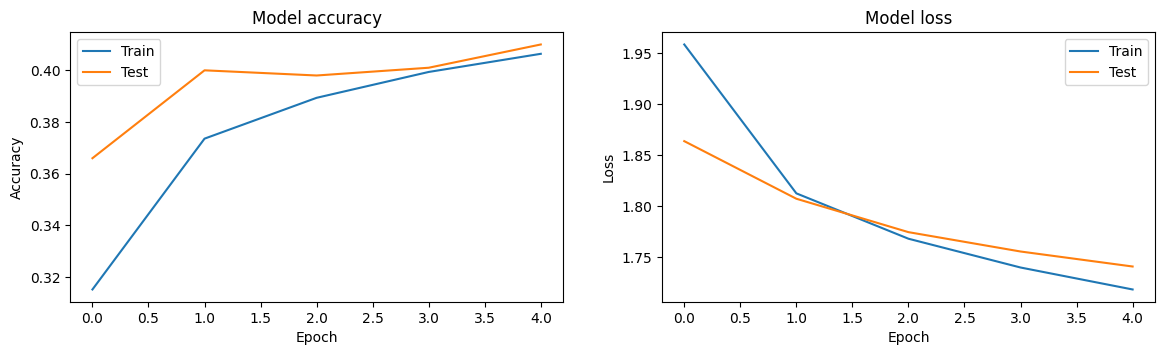

In [26]:
plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around `41%`

In [27]:
scores = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 40.41%


---
---
# [Part 3] Keras Three-Layer ConvNet

For this part, let's recreate the 3-layer Convolutional Neural Net that we tried in part 1, but now using Keras Model



---
## 1 - Define Model

Define a three-layer convnet with the same architecture from Part 1.

You can use any model building style that fits to your taste

A three-layer convolutional network with the following architecture:

<pre>
|                       |                       |         |                 |
| <font color='red'>32 @5x5 Conv2D</font> - <font color=''>relu</font> | <font color='red'>16 @3x3 Conv2D</font> - <font color=''>relu</font> | Flatten | <font color='brown'>Dense</font> - <font color=''>softmax</font> |
|                       |                       |         |                 |
|            1          |           2           |         |        3        |
</pre>
<br>

For the **Convolution Layer**, use the **tensorflow.keras.layers.Conv2D**

---
#### <font color='red'>**EXERCISE:** </font>

    define model:
    * 32 5x5 Conv2D layer with relu activation and padding valid
    * 16 3x3 Conv2D layer with relu activation and padding valid
    * Flatten layer
    * Dense layer with softmax activation



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Create a Sequential model
myConv = Sequential()

# Add the first Conv2D layer with 32 filters, kernel size of (3, 3), and 'relu' activation
myConv.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the second Conv2D layer with 16 filters, kernel size of (3, 3), and 'relu' activation
myConv.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

# Add a Flatten layer to flatten the output of the previous layer
myConv.add(Flatten())

# Add a Dense layer with 10 units and 'softmax' activation for classification
myConv.add(Dense(units=10, activation='softmax'))

# Print the summary of the model
myConv.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 10)                125450    
                                                                 
Total params: 130970 (511.60 KB)
Trainable params: 130970 (511.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Expected Output**:
<pre>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_? (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_? (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
flatten_? (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_? (Dense)              (None, 10)                108170    
=================================================================
Total params: 170,906
Trainable params: 170,906
Non-trainable params: 0

---
## 2 - Compile Model

Here we have to compile the model by registering a loss function and its optimization function

In [29]:
# Compile model
myConv.compile(loss='categorical_crossentropy',
               optimizer='sgd', metrics=['accuracy'])


---
## 3 - Model Checkpoint Callback

When using Keras, we can add several callback functions to the &nbsp; `.fit()` &nbsp; training function.

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

One of the very useful callback functions is **ModelCheckpoint**.

You know that when we train neural networks, training accuracy and validation accuracy should always increase with epoch iteration. But at some point, while training accuracy continues to increase, validation accuracy may go down. Which indicates that the network has **overfit** the data.

Obviously, the model that we want to use is not the model at the end of training epoch, but the one just before the validation accuracy drops.

We can use the **ModelCheckpoint** to periodically save the model only when validation accuracy is increased

In [36]:
import os
os.mkdir('./model1')

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = './model1/my_model.h5'

myCheckpoint = ModelCheckpoint(filepath,
                               monitor='val_acc',
                               save_best_only=True,
                              )

---
## 4 - Early Stopping Callback

Another useful callback function is **EarlyStopping**

With this, we can monitor the training, and when the loss or accuracy is no longer improving for several epochs, we can terminate the training session and investigate what happened.

After that, we can think of what we can do to improve training accuracy, then continue the training.

For this example, we'll monitor the validation loss, and when the loss is not decreasing after 5 epochs, we terminate the training.

Other callback functions can be seen at [tf.keras.callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

myStopping = EarlyStopping(monitor='val_loss',
                          patience=5
                          )

---
## 5 - Live Training Plot Callback

For this part, let's add a custom callback function to perform live training plot between training and validation accuracy


In [39]:
from IPython.display import clear_output


def translate_metric(x):
    translations = {'acc': "Accuracy", 'loss': "Log-loss (cost function)"}
    if x in translations:
        return translations[x]
    else:
        return x

class PlotLosses(tf.keras.callbacks.Callback):
    def __init__(self, figsize=None):
        super(PlotLosses, self).__init__()
        self.figsize = figsize

    def on_train_begin(self, logs={}):

        self.base_metrics = [metric for metric in self.params['metrics'] if not metric.startswith('val_')]
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)

        clear_output(wait=True)
        plt.figure(figsize=self.figsize)

        for metric_id, metric in enumerate(self.base_metrics):
            plt.subplot(1, len(self.base_metrics), metric_id + 1)

            plt.plot(range(1, len(self.logs) + 1),
                     [log[metric] for log in self.logs],
                     label="training")
            if self.params['do_validation']:
                plt.plot(range(1, len(self.logs) + 1),
                         [log['val_' + metric] for log in self.logs],
                         label="validation")
            plt.title(translate_metric(metric))
            plt.xlabel('epoch')
            plt.legend(loc='center right')

        plt.tight_layout()
        plt.show();

myTrainPlot = PlotLosses(figsize=(10, 4))

---
## 6 - Train Model

Now we can train the model by calling the &nbsp; `fit` &nbsp; function



---
#### <font color='red'>**EXERCISE:** </font>

    Train a three-layer ConvNet for epoch=25 with batch size=100
    

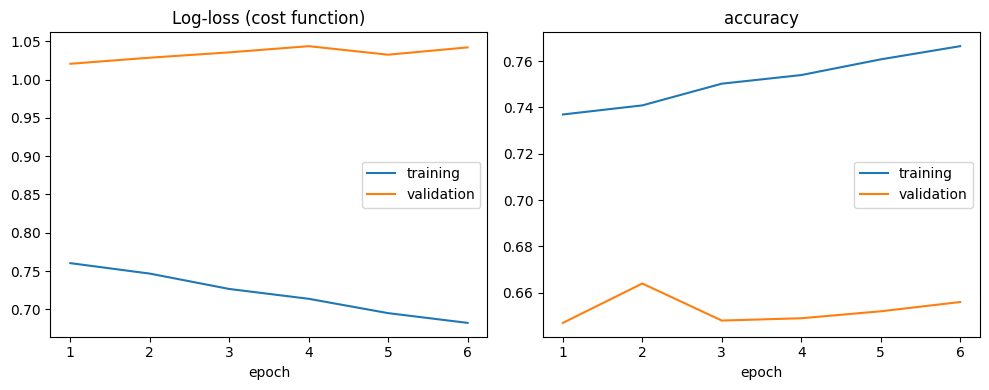

In [40]:
num_epochs = 25
batch_size = 100

history = myConv.fit(X_train, y_train_hot,
                     validation_data=(X_val, y_val_hot),
                     epochs=num_epochs,
                     batch_size=batch_size,
                     callbacks=[myTrainPlot, myCheckpoint, myStopping],
                     verbose=0)

**EXPECTED OUTPUT**:
<pre>
the training should lasts in about 20 epochs
the training loss should start around 1.8 and end around 0.5
while validation loss start around 1.5 then plateau around 1.1

---
## 7 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

First, load the best model from checkpoint

In [41]:
from tensorflow.keras.models import load_model

myConv = load_model('./model1/my_model.h5')

OSError: No file or directory found at ./model1/my_model.h5

Evaluate the model using &nbsp; `X_test` &nbsp; and &nbsp; `y_test_hot`

In [42]:
scores = myConv.evaluate(X_test, y_test_hot, verbose=1)

print("\nModel Accuracy: %.2f%%" % (scores[1]*100))


Model Accuracy: 63.67%


**EXPECTED OUTPUT**:
<pre>
you should get around 63% of testing accuracy

---
---
# [Part 4] CIFAR-10 Open-ended Challenge

In this section you can experiment with whatever ConvNet architecture you'd like on CIFAR-10.

You should experiment with **architectures**, **hyperparameters**, **loss functions**, **regularization**, or anything else you can think of to train a model

You should achieve <font color='blue' size='5'><b>at least 75% accuracy</b></font> on the **validation** set <font color='red' size='4'><b>within 10-20 epochs</b></font>.


---
## Some things you can try:
- **Filter size**: Above we used 5x5 and 3x3; is this optimal?

- **Number of filters**: Above we used 16 and 32 filters. Would more or fewer do better?

- **Pooling**: We didn't use any pooling above. Would this improve the model?

- **Normalization**: Would your model be improved with batch normalization, layer normalization, group normalization, or some other normalization strategy?

- **Network architecture**: The ConvNet above has only three layers of trainable parameters. Would a deeper model do better?

- **Global average pooling**: Instead of flattening after the final convolutional layer, would global average pooling do better? This strategy is used for example in Google's Inception network and in Residual Networks.

- **Regularization**: Would some kind of regularization improve performance? Maybe weight decay or dropout?

- **Optimization**: You've seen various advanced optimization function. Maybe changing the optimization using Adam or RMSProp will increase the accuracy?

<br><center>
<font color='red' size='4'><b>--- You must design YOUR OWN Architecture --- <br>
--- And train it from scratch --- </b></font>

---
## Tips for training
For each network architecture that you try, you should tune the learning rate and other hyperparameters.

When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations

- Remember the coarse-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.

- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.

- You should use the validation set for hyperparameter search, and save your test set for evaluating your architecture on the best parameters as selected by the validation set.

<center>
<h2><font color='blue'>--- Go Wild, Have Fun, and Happy Training!  --- </font></h2>

---
## 1 - Define Model

---
#### <font color='red'>**EXERCISE:** </font>

    Design your Convolutional Neural Network Architecture

    

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

myModel=Sequential()
# Add the first Conv2D layer with 32 filters, kernel size of (3, 3), and 'relu' activation
myModel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the second Conv2D layer with 16 filters, kernel size of (3, 3), and 'relu' activation
myModel.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

# Add a Flatten layer to flatten the output of the previous layer
myModel.add(Flatten())

# Add a Dense layer with 10 units and 'softmax' activation for classification
myModel.add(Dense(units=10, activation='softmax'))


myModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_9 (Dense)             (None, 10)                125450    
                                                                 
Total params: 130970 (511.60 KB)
Trainable params: 130970 (511.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
## 2 - Train Model

---
#### <font color='red'>**EXERCISE:** </font>

    Compile the model
    Train the model
    

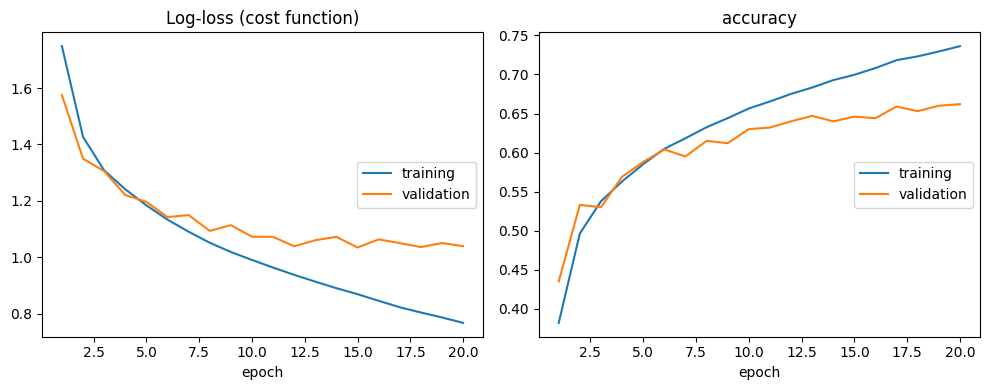

In [47]:
# Compile model
myModel.compile(loss='categorical_crossentropy',
               optimizer='sgd', metrics=['accuracy'])

num_epochs = 25
batch_size = 100

history = myModel.fit(X_train, y_train_hot,
                     validation_data=(X_val, y_val_hot),
                     epochs=num_epochs,
                     batch_size=batch_size,
                     callbacks=[myTrainPlot, myCheckpoint, myStopping],
                     verbose=0)


---
## 3 - Evaluate Model

---
#### <font color='red'>**EXERCISE:** </font>

    evaluate your model on test set
    

In [48]:
myModel = load_model('./model1/my_model.h5')

train_scores = myModel.evaluate(X_train, y_train_hot, verbose=1)
val_scores   = myModel.evaluate(X_val, y_val_hot, verbose=1)
test_scores  = myModel.evaluate(X_test, y_test_hot, verbose=1)

print("\nTraining Accuracy:   %.2f%%" % (train_scores[1]*100))
print("Validation Accuracy: %.2f%%" % (val_scores[1]*100))
print("Testing Accuracy:    %.2f%%" % (test_scores[1]*100))

OSError: No file or directory found at ./model1/my_model.h5

**EXPECTED OUTPUT**:
<pre>
you should get above 80% of accuracy for train, val, and test set

---
## 4 - Test Model on New Image

For this part, you have to test your model on new image

First of all, search for five images on the Internet, then list the URLs to the code below.

The five images must belong to the 10 CIFAR-10 classes that the model recognizes.

---
#### <font color='red'>**EXERCISE:** </font>

    define five image urls
    one image has been given for an example, you can change it

In [1]:
!wget -q -O 'data_test_0.jpg' 'https://ichef.bbci.co.uk/news/912/cpsprodpb/160B4/production/_103229209_horsea.png'
!wget -q -O 'data_test_1.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrideFPDHrWGgd-32tgL-fZYPc_ecKfgu9VbysOC2dvA&s'
!wget -q -O 'data_test_2.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDOQ4CN-gM-vRT1QrdtojKqsk0Zahdj3LWew&s'
!wget -q -O 'data_test_3.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGdJgxCwuG37OSGVIDLqLu6hRUD0sKUhXGdw&s'
!wget -q -O 'data_test_4.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbi92k0am7_94T88o4fnNmGZMcgL2nsslWxw&s'

Run and Recognize the images

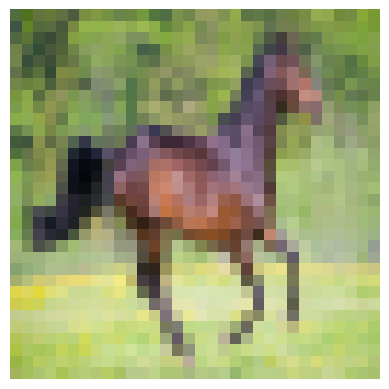

NameError: name 'mean_pixel' is not defined

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, (32,32), interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = (new_img2 - mean_pixel) / std_pixel
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('predicted id   :',class_id)
  print('predicted class:', class_names[class_id])
  print('--------------------------------\n\n')